# Final Project Code #

**Here we will have all the code related to the completion of the final project**

## Data Import and Cleaning ##

In [2]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import scipy.stats as st

In [3]:
# --- Load dataset from local CSV (using only 5 variables + target) ---
heart_disease = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
df=pd.DataFrame(heart_disease.data.original)
# Load local file (already uploaded in Colab)
#csv_path = "/content/datafile.csv.zip"
#df = pd.read_csv(csv_path)
#df=fetch_ucirepo(id=45).data
#df=df.data
# Keep only the columns we actually use
target_col = "Diabetes_binary"
use_cols = [target_col, "HighBP", "HighChol", "BMI", "Age", "PhysActivity"]
df_small = df[use_cols].copy()

# Separate features and target
Target = df_small[[target_col]]
Features = df_small.drop(columns=[target_col])

# Basic metadata
metadata = {
    "source": "CDC Behavioral Risk Factor Surveillance System (BRFSS) 2015",
    "instances": df_small.shape[0],
    "variables": len(use_cols),
    "target_column": target_col,
    "description": "Subset of CDC dataset focused on five main health indicators linked to diabetes."
}

# Variable info
variables = pd.DataFrame({
    "Column": df_small.columns,
    "Non-Null Count": df_small.notnull().sum().values,
    "Dtype": df_small.dtypes.values
})

# Print results
print("=== Metadata ===")
for k, v in metadata.items():
    print(f"{k}: {v}")

print("\n=== Variables ===")
print(variables)

print("\n=== Target Preview ===")
print(Target.head())

print("\n=== Features Preview ===")
print(Features.head())


=== Metadata ===
source: CDC Behavioral Risk Factor Surveillance System (BRFSS) 2015
instances: 253680
variables: 6
target_column: Diabetes_binary
description: Subset of CDC dataset focused on five main health indicators linked to diabetes.

=== Variables ===
            Column  Non-Null Count  Dtype
0  Diabetes_binary          253680  int64
1           HighBP          253680  int64
2         HighChol          253680  int64
3              BMI          253680  int64
4              Age          253680  int64
5     PhysActivity          253680  int64

=== Target Preview ===
   Diabetes_binary
0                0
1                0
2                0
3                0
4                0

=== Features Preview ===
   HighBP  HighChol  BMI  Age  PhysActivity
0       1         1   40    9             0
1       0         0   25    7             1
2       1         1   28    9             0
3       1         0   27   11             1
4       1         1   24   11             1


In [4]:
print("\nSelected columns:", df_small.columns.tolist())
print("\nMissing values per column:\n", df_small.isna().sum())


Selected columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Age', 'PhysActivity']

Missing values per column:
 Diabetes_binary    0
HighBP             0
HighChol           0
BMI                0
Age                0
PhysActivity       0
dtype: int64



BMI range after cleaning: 18 to 50


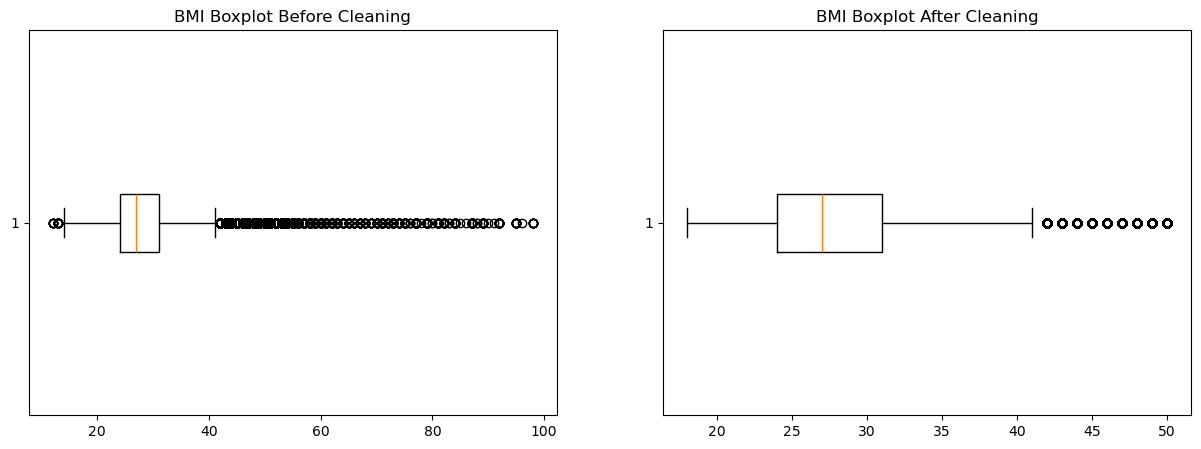

In [5]:
# --- Clean BMI (remove extreme outliers) ---
#Showing boxplot of BMI prior to clean
fig, ax=plt.subplots(1,2, figsize=(15,5))
ax[0].boxplot(df['BMI'],orientation='horizontal')

q01, q99 = df_small["BMI"].quantile([0.01, 0.99])
df_small["BMI"] = df_small["BMI"].clip(lower=q01, upper=q99)
print("\nBMI range after cleaning:", df_small["BMI"].min(), "to", df_small["BMI"].max())

#Showing boxplot of BMI after to clean
ax[1].boxplot(df_small['BMI'],orientation='horizontal')

ax[0].set_title('BMI Boxplot Before Cleaning')
ax[1].set_title('BMI Boxplot After Cleaning')
plt.show()

## Statistical Analysis ##

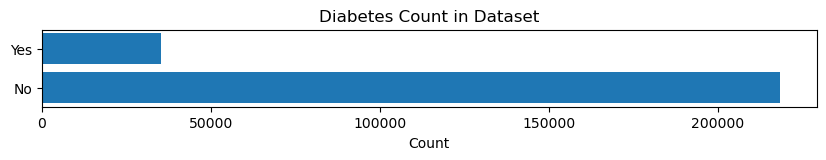

Proportion % of Yes: 13.93


In [29]:
fig, ax=plt.subplots(figsize=(10,1))
ax.barh(('No','Yes'),width=[len(df_small.loc[df_small['Diabetes_binary']==0,'Diabetes_binary'])
                            ,len(df_small.loc[df_small['Diabetes_binary']==1,'Diabetes_binary'])])
ax.set_title('Diabetes Count in Dataset')
ax.set_xlabel('Count')
plt.show()
print('Proportion % of Yes:',round((len(df_small.loc[df_small['Diabetes_binary']==1,'Diabetes_binary'])/len(df_small))*100,2))

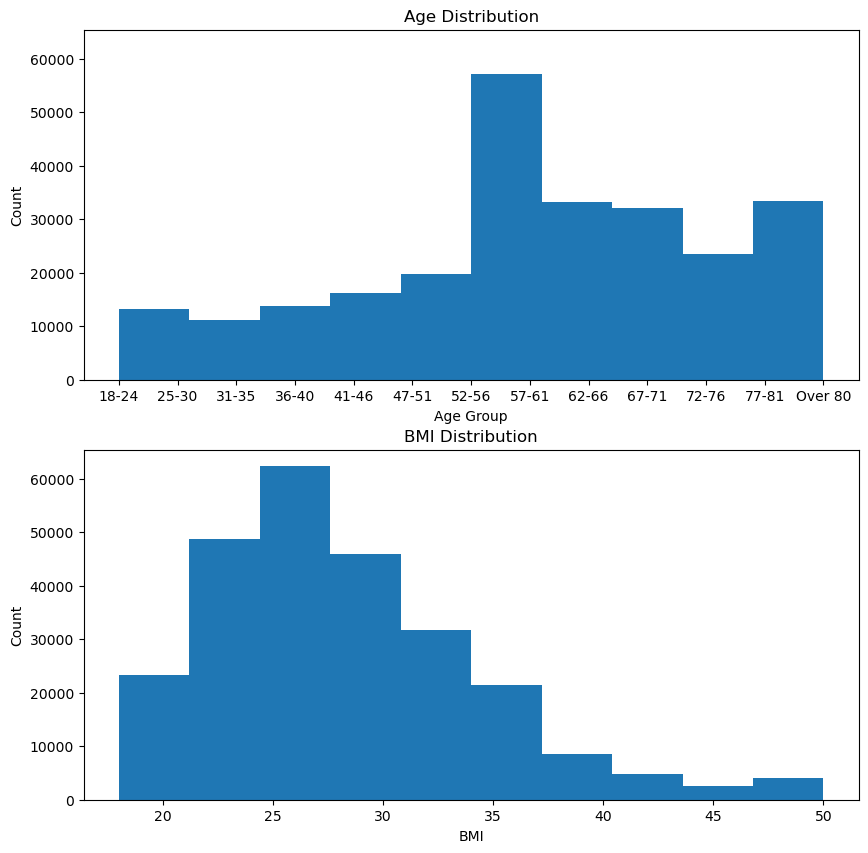

In [35]:
fig, ax=plt.subplots(2,1,figsize=(10, 10),sharey=True)

ax[0]. hist(df_small['Age'])
ax[0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13],['18-24','25-30','31-35','36-40','41-46','47-51','52-56','57-61','62-66','67-71','72-76','77-81','Over 80'])
ax[0].set_title('Age Distribution')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Age Group')

ax[1].hist(df_small['BMI'])
ax[1].set_title('BMI Distribution')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('BMI')

plt.show() 

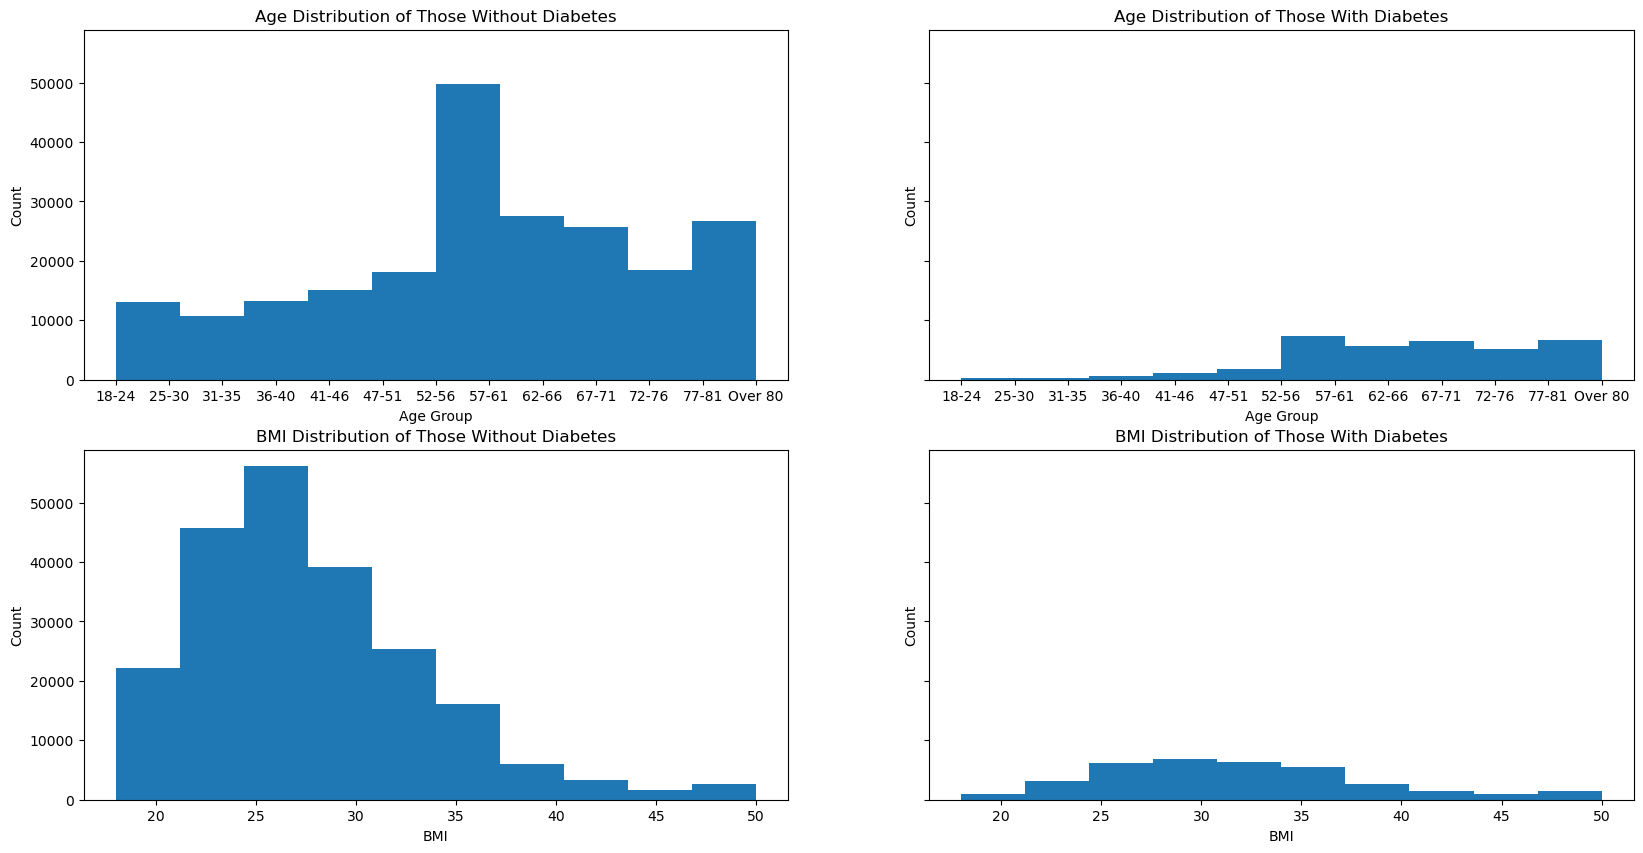

In [59]:
fig, ax=plt.subplots(2,2,figsize=(20, 10),sharey=True)

ax[0,0]. hist(df_small.loc[df_small['Diabetes_binary'] == 0, 'Age'])
ax[0,0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13],['18-24','25-30','31-35','36-40','41-46','47-51','52-56','57-61','62-66','67-71','72-76','77-81',
                                                    'Over 80'])
ax[0,0].set_title('Age Distribution of Those Without Diabetes')
ax[0,0].set_ylabel('Count')
ax[0,0].set_xlabel('Age Group')

ax[0,1]. hist(df_small.loc[df_small['Diabetes_binary'] == 1, 'Age'])
ax[0,1].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13],['18-24','25-30','31-35','36-40','41-46','47-51','52-56','57-61','62-66','67-71','72-76','77-81',
                                                    'Over 80'])
ax[0,1].set_title('Age Distribution of Those With Diabetes')
ax[0,1].set_ylabel('Count')
ax[0,1].set_xlabel('Age Group')


ax[1,0].hist(df_small.loc[df_small['Diabetes_binary'] == 0, 'BMI'])
ax[1,0].set_title('BMI Distribution of Those Without Diabetes')
ax[1,0].set_ylabel('Count')
ax[1,0].set_xlabel('BMI')

ax[1,1].hist(df_small.loc[df_small['Diabetes_binary'] == 1, 'BMI'])
ax[1,1].set_title('BMI Distribution of Those With Diabetes')
ax[1,1].set_ylabel('Count')
ax[1,1].set_xlabel('BMI')
plt.show() 

In [36]:
from scipy.stats import t

In [61]:
print('Age mean: ',round(np.mean(df_small['Age']),2))

withAge=df_small.loc[df_small['Diabetes_binary'] == 1, 'Age']
withoutAge=df_small.loc[df_small['Diabetes_binary'] == 0, 'Age']
confidence_level=0.95

ci1=t.interval(confidence_level, df=len(withAge)-1, loc=np.mean(withAge), scale=np.std(withAge, ddof=1) / np.sqrt(len(withAge)))
print('Age With Diabetes CI:',round(ci1[0],2),'-',round(ci1[1],2))

ci2=t.interval(confidence_level, df=len(withoutAge)-1, loc=np.mean(withoutAge), scale=np.std(withoutAge, ddof=1) / np.sqrt(len(withoutAge)))
print('Age Without Diabetes CI:',round(ci2[0],2),'-',round(ci2[1],2))

Age mean:  8.03
Age With Diabetes CI: 9.35 - 9.4
Age Without Diabetes CI: 7.8 - 7.83


In [62]:
print('BMI Mean:',round(np.mean(df_small['BMI']),2))

withBMI=df_small.loc[df_small['Diabetes_binary'] == 1, 'BMI']
withoutBMI=df_small.loc[df_small['Diabetes_binary'] == 0, 'BMI']
confidence_level=0.95

ci1=t.interval(confidence_level, df=len(withBMI)-1, loc=np.mean(withBMI), scale=np.std(withBMI, ddof=1) / np.sqrt(len(withBMI)))
print('BMI With Diabetes CI:',round(ci1[0],2),'-',round(ci1[1],2))

ci2=t.interval(confidence_level, df=len(withoutBMI)-1, loc=np.mean(withoutBMI), scale=np.std(withoutBMI, ddof=1) / np.sqrt(len(withoutBMI)))
print('BMI With Diabetes CI:',round(ci2[0],2),'-',round(ci2[1],2))

BMI Mean: 28.29
BMI With Diabetes CI: 31.71 - 31.85
BMI With Diabetes CI: 27.7 - 27.74


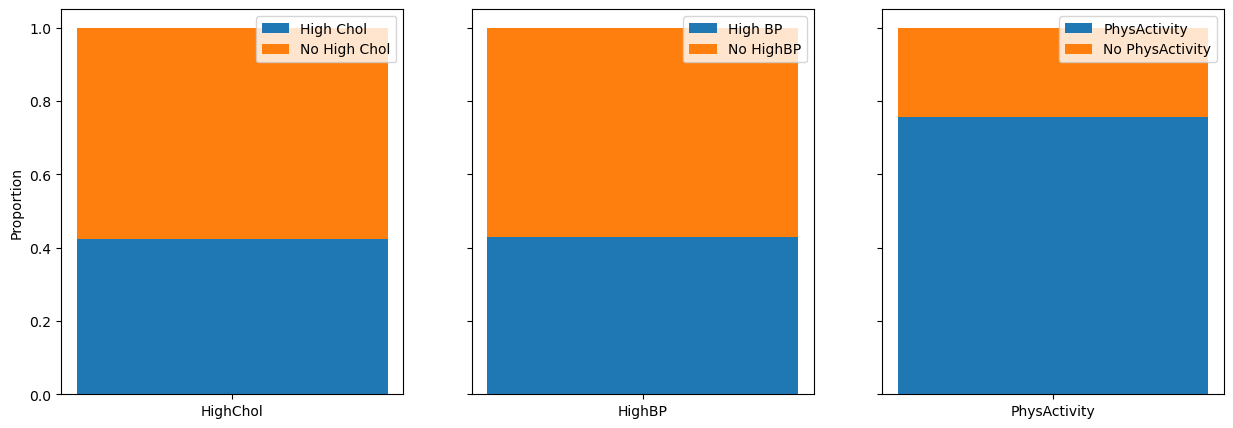

In [58]:
fig, ax =plt.subplots(1,3, figsize=(15,5),sharey=True)
height=len(df_small)
x_label=('No Diabetes','Diabetes')

HighChol=df_small.groupby(['Diabetes_binary', 'HighChol']).size().unstack()
ax[0].bar('HighChol',height=sum(df_small['HighChol'])/height,label='High Chol')
ax[0].bar('HighChol',height=(height-sum(df_small['HighChol']))/height,bottom=sum(df_small['HighChol'])/height,label='No High Chol')
ax[0].set_ylabel('Proportion')

HighBP=df_small.groupby(['Diabetes_binary', 'HighBP']).size().unstack()
ax[1].bar('HighBP',height=sum(df_small['HighBP'])/height,label='High BP')
ax[1].bar('HighBP',height=(height-sum(df_small['HighBP']))/height,bottom=sum(df_small['HighBP'])/height,label='No HighBP')

PhysActivity=df_small.groupby(['Diabetes_binary', 'PhysActivity']).size().unstack()
ax[2].bar('PhysActivity',height=sum(df_small['PhysActivity'])/height,label='PhysActivity')
ax[2].bar('PhysActivity',height=(height-sum(df_small['PhysActivity']))/height,bottom=sum(df_small['PhysActivity'])/height,label='No PhysActivity')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

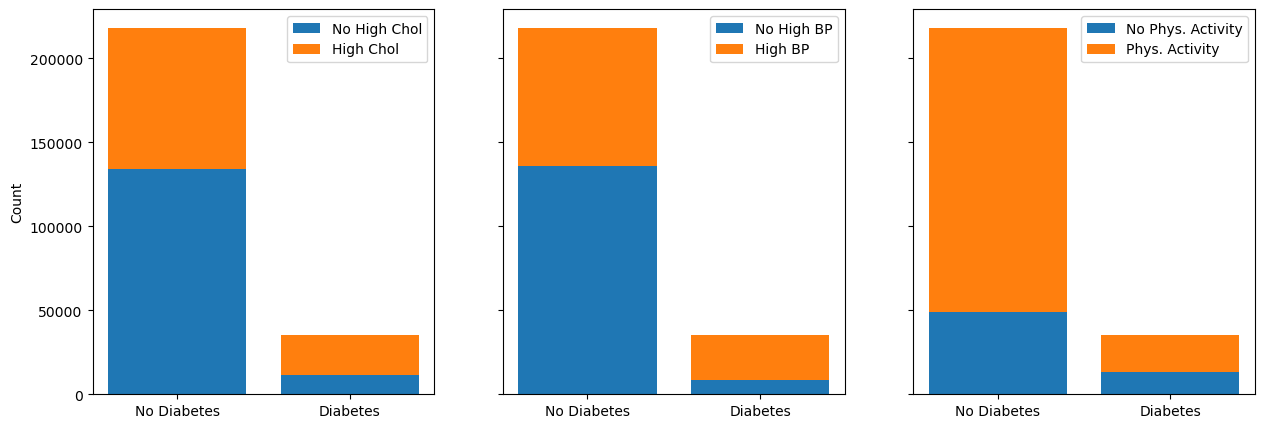

In [40]:
fig, ax =plt.subplots(1,3, figsize=(15,5),sharey=True)
height=len(df_small)
x_label=('No Diabetes','Diabetes')

HighChol=df_small.groupby(['Diabetes_binary', 'HighChol']).size().unstack()
ax[0].bar(x_label,height=[HighChol[0][0],HighChol[0][1]],label='No High Chol')
ax[0].bar(x_label,height=[HighChol[1][0],HighChol[1][1]],bottom=[HighChol[0][0],HighChol[0][1]],label='High Chol')
ax[0].set_ylabel('Count')

HighBP=df_small.groupby(['Diabetes_binary', 'HighBP']).size().unstack()
ax[1].bar(x_label,height=[HighBP[0][0],HighBP[0][1]],label='No High BP')
ax[1].bar(x_label,height=[HighBP[1][0],HighBP[1][1]],bottom=[HighBP[0][0],HighBP[0][1]],label='High BP')

PhysActivity=df_small.groupby(['Diabetes_binary', 'PhysActivity']).size().unstack()
ax[2].bar(x_label,height=[PhysActivity[0][0],PhysActivity[0][1]],label='No Phys. Activity')
ax[2].bar(x_label,height=[PhysActivity[1][0],PhysActivity[1][1]],bottom=[PhysActivity[0][0],PhysActivity[0][1]],label='Phys. Activity')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

In [16]:
from statsmodels.stats.proportion import proportion_confint
#sum(Countwith)

In [17]:
HighChol

HighChol,0,1
Diabetes_binary,,
0,134429,83905
1,11660,23686


In [67]:
CountWithout=HighChol[0][0]+HighChol[1][0]
Countwith=HighChol[0][1]+HighChol[1][1]

dataProp=len(df_small[df_small['HighChol'] == 1])/len(df_small)
dataProp=dataProp*100
print('HighChol mean:',round(dataProp,2))

propWithout=proportion_confint(count=HighChol[1][0], nobs=CountWithout, alpha=confidence_level, method='wilson')
print('HighChol without Diabetes CI:',round(propWithout[0]*100,2),'-',round(propWithout[1]*100,2))

propWith=proportion_confint(count=HighChol[1][1], nobs=Countwith, alpha=confidence_level, method='wilson')
print('HighChol with Diabetes CI:',round(propWith[0]*100,2),'-',round(propWith[1]*100,2))

HighChol mean: 42.41
HighChol without Diabetes CI: 38.42 - 38.44
HighChol with Diabetes CI: 67.0 - 67.03


In [68]:
CountWithout=HighBP[0][0]+HighBP[1][0]
Countwith=HighBP[0][1]+HighBP[1][1]

dataProp=len(df_small[df_small['HighBP'] == 1])/len(df_small)
dataProp=dataProp*100
print('HighBP mean:',round(dataProp,2))

propWithout=proportion_confint(count=HighBP[1][0], nobs=CountWithout, alpha=confidence_level, method='wilson')
print('HighBP without Diabetes CI:',round(propWithout[0]*100,2),'-',round(propWithout[1]*100,2))

propWith=proportion_confint(count=HighBP[1][1], nobs=Countwith, alpha=confidence_level, method='wilson')
print('HighBP with Diabetes CI:',round(propWith[0]*100,2),'-',round(propWith[1]*100,2))

HighBP mean: 42.9
HighBP without Diabetes CI: 37.65 - 37.67
HighBP with Diabetes CI: 75.25 - 75.28


In [69]:
CountWithout=PhysActivity[0][0]+PhysActivity[1][0]
Countwith=PhysActivity[0][1]+PhysActivity[1][1]

dataProp=len(df_small[df_small['PhysActivity'] == 1])/len(df_small)
dataProp=dataProp*100
print('PhysActivity mean:',round(dataProp,2))

propWithout=proportion_confint(count=PhysActivity[1][0], nobs=CountWithout, alpha=confidence_level, method='wilson')
print('PhysActivity without Diabetes CI:',round(propWithout[0]*100,2),'-',round(propWithout[1]*100,2))

propWith=proportion_confint(count=PhysActivity[1][1], nobs=Countwith, alpha=confidence_level, method='wilson')
print('PhysActivity with Diabetes CI:',round(propWith[0]*100,2),'-',round(propWith[1]*100,2))

PhysActivity mean: 75.65
PhysActivity without Diabetes CI: 77.69 - 77.7
PhysActivity with Diabetes CI: 63.04 - 63.07


In [21]:
print(pd.crosstab(df_small['Diabetes_binary'], df_small['HighChol'],normalize=True),'\n')
print(pd.crosstab(df_small['Diabetes_binary'], df_small['HighBP'],normalize=True),'\n')
print(pd.crosstab(df_small['Diabetes_binary'], df_small['PhysActivity'],normalize=True))

HighChol                0         1
Diabetes_binary                    
0                0.529916  0.330751
1                0.045963  0.093370 

HighBP                  0         1
Diabetes_binary                    
0                0.536538  0.324129
1                0.034461  0.104872 

PhysActivity            0         1
Diabetes_binary                    
0                0.191978  0.668689
1                0.051478  0.087855


In [70]:
#Lets look at the correlation of the Target variable
correlations1 = df_small.corrwith(df_small['Diabetes_binary'],method='pearson')
print(correlations1)
correlations2 = df_small.corrwith(df_small['Diabetes_binary'],method='spearman')
print(correlations2)

Diabetes_binary    1.000000
HighBP             0.263129
HighChol           0.200276
BMI                0.233069
Age                0.177442
PhysActivity      -0.118133
dtype: float64
Diabetes_binary    1.000000
HighBP             0.263129
HighChol           0.200276
BMI                0.226341
Age                0.177684
PhysActivity      -0.118133
dtype: float64


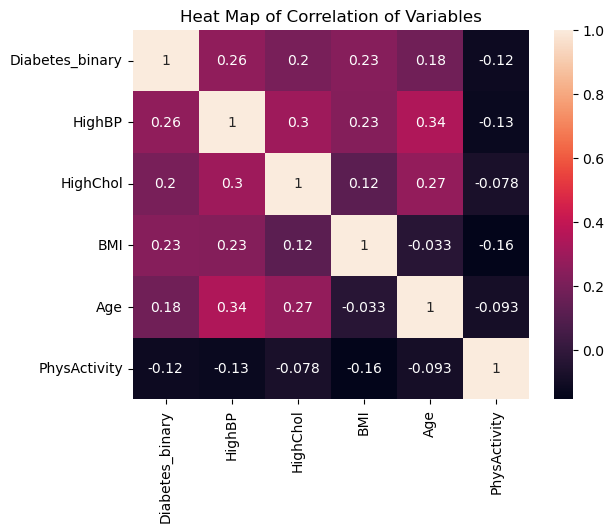

In [23]:
sns.heatmap(df_small.corr(),annot=True)
plt.title('Heat Map of Correlation of Variables')
plt.show()

## Model Selection ##

In [24]:
# --- Split data ---
X = df_small.drop(columns=[target_col])
y = df_small[target_col].astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\nTrain/Test split:", X_train.shape, X_test.shape)

# --- Scale BMI only ---
scaler = StandardScaler()
X_train["BMI"] = scaler.fit_transform(X_train[["BMI"]])
X_test["BMI"] = scaler.transform(X_test[["BMI"]])


Train/Test split: (202944, 5) (50736, 5)


Since this is a classification problem, we need to use a classification model. Some models can be Logistic Regression, Decision trees, etc. Here we will test the validation score of a few models to decide which one to use.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
models=[LogisticRegression(max_iter=300),DecisionTreeClassifier(),KNeighborsClassifier()]
for model in models:
    cv_score=cross_validate(model,X,y,cv=5)
    mean_accuracy=(sum(cv_score['test_score'])/len(cv_score['test_score']))*100
    #print(model,'###',cv_score['test_score'])
    print(model,'Accuracy:',round(mean_accuracy,2))

LogisticRegression(max_iter=300) Accuracy: 86.16
DecisionTreeClassifier() Accuracy: 86.08
KNeighborsClassifier() Accuracy: 83.75


Based on the cross validation scores,we will test Logistic Regression and Decision Tree Classifiers. Specifically we will test the Random Forest Classifier, which is an ensamble of Decision Trees.

## Model Analysis ##

In [14]:

# --- Logistic Regression ---
print("\n=== Logistic Regression ===")
logit = LogisticRegression(max_iter=300, multi_class="multinomial", class_weight="balanced")
logit.fit(X_train, y_train)
pred = logit.predict(X_test)
proba = logit.predict_proba(X_test)
print(classification_report(y_test, pred, digits=3))
print("ROC AUC:", roc_auc_score(y_test, proba, multi_class="ovr"))




=== Logistic Regression ===


C:\Users\jacks\anaconda3\envs\pymc_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1262: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0      0.942     0.691     0.797     43667
           1      0.279     0.738     0.405      7069

    accuracy                          0.698     50736
   macro avg      0.611     0.715     0.601     50736
weighted avg      0.850     0.698     0.743     50736



In [15]:
# --- Random Forest ---
print("\n=== Random Forest ===")
rf = RandomForestClassifier(
    n_estimators=300, random_state=42, class_weight="balanced_subsample"
)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
proba_rf = rf.predict_proba(X_test)
print(classification_report(y_test, pred_rf, digits=3))
print("ROC AUC:", roc_auc_score(y_test, proba_rf, multi_class="ovr"))



=== Random Forest ===
              precision    recall  f1-score   support

           0      0.940     0.691     0.797     43667
           1      0.276     0.727     0.400      7069

    accuracy                          0.696     50736
   macro avg      0.608     0.709     0.598     50736
weighted avg      0.847     0.696     0.741     50736



In [16]:

# --- Feature Importance ---
imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(imp)



Feature Importance:
HighBP          0.334129
BMI             0.310234
Age             0.180519
HighChol        0.146245
PhysActivity    0.028874
dtype: float64


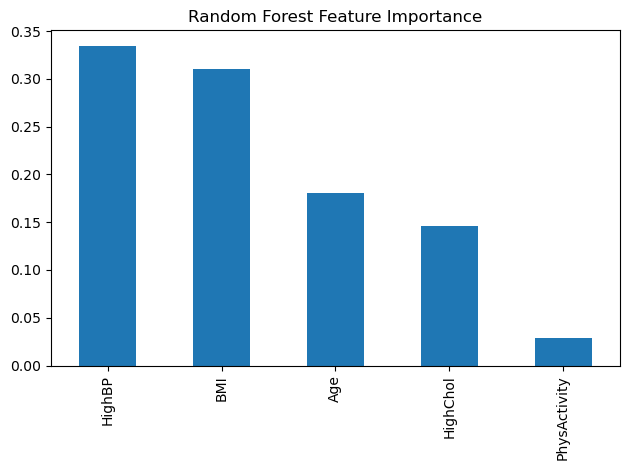

In [17]:

imp.plot(kind="bar", title="Random Forest Feature Importance")
plt.tight_layout()
plt.show()


In [18]:

# # --- Save cleaned dataset ---
# df_small.to_csv("cdc_diabetes_clean_5vars.csv", index=False)
# print("\nSaved cleaned dataset: cdc_diabetes_clean_5vars.csv")


### Why We Chose These 8 Variables
We focused on five variables that are known to have the strongest relationship with diabetes:
- **HighBP**: high blood pressure often occurs with diabetes.
- **HighChol**: high cholesterol is common in diabetic patients.
- **BMI**: obesity is a major risk factor for diabetes.
- **Age**: risk increases with age.
- **PhysActivity**: physical activity lowers the chance of diabetes.